In [17]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [18]:
N = 100
mu = np.array([2, 3])
C = np.array([[1, 0.5], [0.5, 10]])
num_bin_x = 30
num_bin_y = 30

(100, 2)


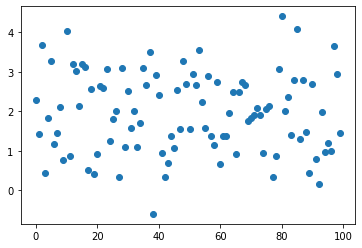

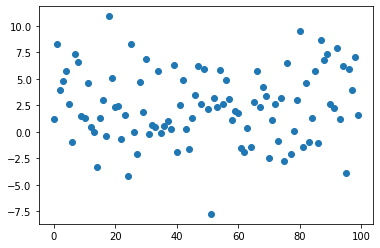

In [19]:
r = np.random.multivariate_normal(mu, C, N)
print(r.shape)

# First vector
plt.figure()
plt.scatter(np.arange(r[:,0].size), r[:,0])
plt.show()

# Second vector
plt.figure()
plt.scatter(np.arange(r[:,1].size), r[:,1])
plt.show()

In [20]:
Cest = np.cov(np.transpose(r))
mu_est = np.mean(r, axis=0)
print("Estimated Covariance: ", Cest, "\nMean Estimated: ", mu_est)

Estimated Covariance:  [[ 1.02731433  0.4181845 ]
 [ 0.4181845  11.37792284]] 
Mean Estimated:  [1.95527894 2.43844464]


In [21]:
R = C + np.transpose(mu) * mu # Theoretical Correlation Matrix
Rest = Cest + np.transpose(mu_est) * mu_est # Estimated correlation matrix
print("Theoretical Correlation Matrix: ", R, "\nEstimated Correlation Matrix: ", Rest)


Theoretical Correlation Matrix:  [[ 5.   9.5]
 [ 4.5 19. ]] 
Estimated Correlation Matrix:  [[ 4.85043008  6.36419677]
 [ 4.24130025 17.3239351 ]]


Text(0.5, 0, 'x2')

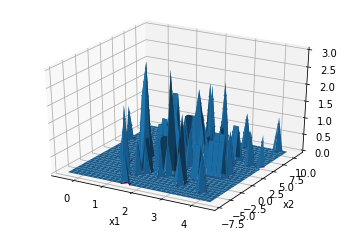

In [22]:
[n, xaxis, yaxis] = np.histogram2d(r[:,0], r[:, 1], [num_bin_x, num_bin_y])
X, Y = np.meshgrid(xaxis[1:], yaxis[1:])
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, n)
ax.axes.contour(X,Y,n)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

In [23]:
#Function to generate the graphs
def genHistCov(mu: np.array, C: np.array, N: int, num_bin_x: int, num_bin_y: int):
    r = np.random.multivariate_normal(mu, C, N)
    [n, xaxis, yaxis] = np.histogram2d(r[:,0], r[:, 1], [num_bin_x, num_bin_y])
    print(n.shape, xaxis.shape, yaxis.shape)
    X, Y = np.meshgrid(xaxis[1:], yaxis[1:])
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, n)
    ax.axes.contour(X,Y,n)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

(30, 30) (31,) (31,)


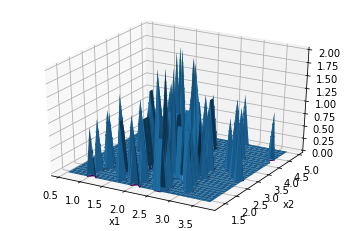

In [24]:
# Letter a)
Ca = np.array([[0.5, 0], [0, 0.5]])
genHistCov(mu, Ca, N, num_bin_x, num_bin_y)

There are covariance only between the vectors itself, there is no covariance of vector x1 with x2. So the graph presents higher values on diagonal.

(30, 30) (31,) (31,)


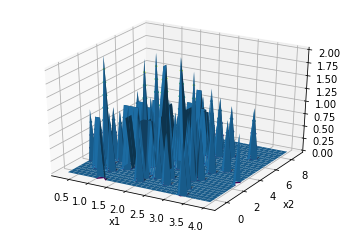

In [25]:
# Letter b)
Cb = np.array([[0.5, 0], [0, 4]])
genHistCov(mu, Cb, N, num_bin_x, num_bin_y)

There are covariance only in the vectors itself as the letter before, but now the "auto-covariance" of vector x2 is bigger, so we can see the values varying more in relation to x2

(30, 30) (31,) (31,)


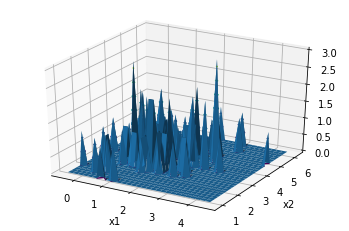

In [26]:
# Letter c)
Cc = np.array([[1, 0.5], [0.5, 1]])
genHistCov(mu, Cc, N, num_bin_x, num_bin_y)

it has similar behavior for auto covariance as before, but now there is a covaiance between variables which makes the values more concentrated in a region of the graph